In [2]:
import pickle
#with open('/path/to/your/file/jsb-chorales-16th.pkl', 'rb') as p:
with open('/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/JSB-Chorales-dataset-master/jsb-chorales-16th.pkl', 'rb') as p:
    data = pickle.load(p, encoding="latin1")

In [4]:

import numpy as np
import os

# Print current working directory (to verify file location)
print("Current working directory:", os.getcwd())



# Check the type of the data
print("Type of loaded data:", type(data))

# If the data is a dictionary, list the keys and number of items in each.
if isinstance(data, dict):
    for key, value in data.items():
        print(f"Key: {key}, Number of chorales: {len(value)}")
elif isinstance(data, list):
    print("Number of chorales in dataset:", len(data))

Current working directory: /Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS
Type of loaded data: <class 'collections.defaultdict'>
Key: test, Number of chorales: 77
Key: train, Number of chorales: 229
Key: valid, Number of chorales: 76
Key: 0, Number of chorales: 0


In [ ]:
import numpy as np

# Initialize a variable for a valid chorale.
chosen = None

if isinstance(data, list):
    for i, chor in enumerate(data):
        chor_array = np.array(chor)
        # Print the shape to inspect it
        print(f"Chorale {i} shape: {chor_array.shape}")
        # Check for a valid chorale shape (ensure it is 2D and not empty)
        if chor_array.ndim == 2 and chor_array.size != 0:
            chosen = chor_array
            print(f"Using chorale {i} for visualization.")
            break
elif isinstance(data, dict):
    # For example, use the 'train' key if it exists.
    for key in data:
        for i, chor in enumerate(data[key]):
            chor_array = np.array(chor)
            print(f"Chorale {i} in {key} shape: {chor_array.shape}")
            if chor_array.ndim == 2 and chor_array.size != 0:
                chosen = chor_array
                print(f"Using chorale {i} from '{key}' for visualization.")
                break
        if chosen is not None:
            break

if chosen is None:
    raise ValueError("No suitable chorale found for visualization.")

Chorale 0 in test shape: (228, 4)
Using chorale 0 from 'test' for visualization.


First 5 rows of the selected chorale:
[[65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [72 60 55 52]]


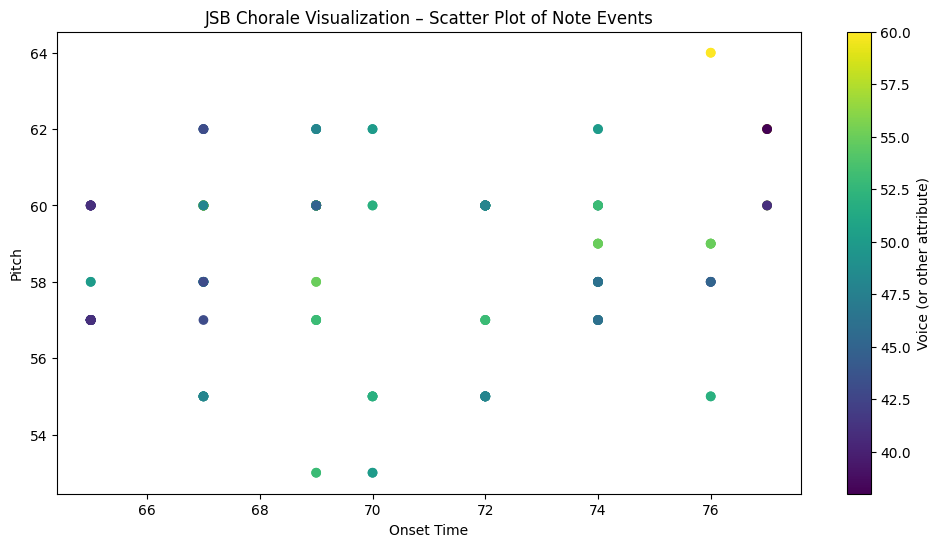

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os


# Select chorale 0 from the 'test' key
chorale = data['test'][0]  # chorale shape: (228, 4)
chorale_array = np.array(chorale)

# (Optional) Print the first few rows to verify the columns
print("First 5 rows of the selected chorale:")
print(chorale_array[:5])

# Create a scatter plot
plt.figure(figsize=(12, 6))
# Using column 0 (onset) as x, column 2 (pitch) as y, and column 3 for color coding
sc = plt.scatter(chorale_array[:, 0], chorale_array[:, 2], c=chorale_array[:, 3], cmap='viridis', marker='o')
plt.xlabel('Onset Time')
plt.ylabel('Pitch')
plt.title('JSB Chorale Visualization – Scatter Plot of Note Events')
plt.colorbar(sc, label='Voice (or other attribute)')
plt.show()

First 5 rows of the selected chorale:
[[65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [72 60 55 52]]


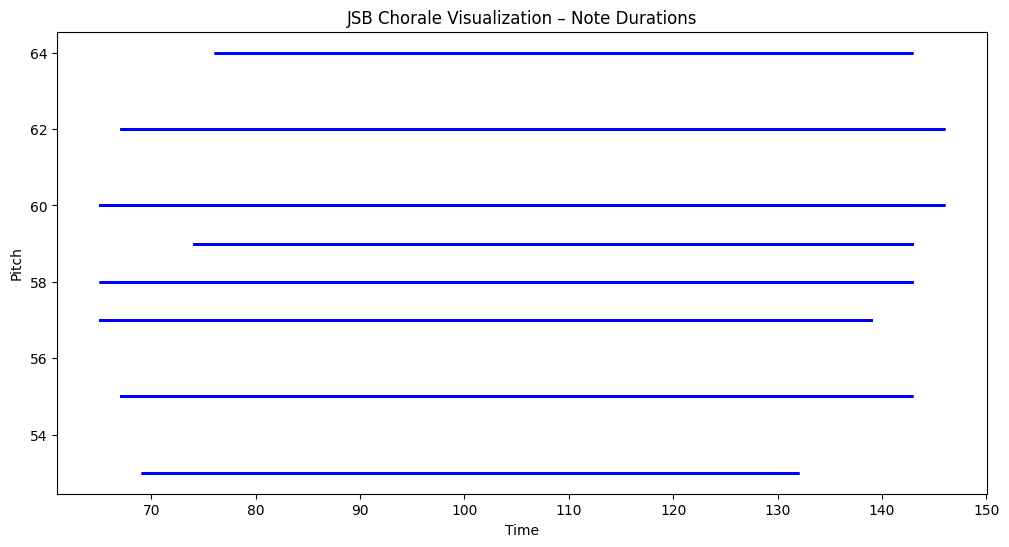

In [7]:

import numpy as np
import matplotlib.pyplot as plt



# Select chorale 0 from the 'test' key
chorale = data['test'][0]  # chorale shape: (228, 4)
chorale_array = np.array(chorale)

# (Optional) Print the first few rows to verify the columns
print("First 5 rows of the selected chorale:")
print(chorale_array[:5])

# Extract columns (adjust these indices if your column meanings differ)
onset   = chorale_array[:, 0]
duration = chorale_array[:, 1]
pitch   = chorale_array[:, 2]
# column 3 is available for additional use (e.g. voice) if desired

plt.figure(figsize=(12, 6))
for o, d, p in zip(onset, duration, pitch):
    # Plot a horizontal line from the onset time to onset + duration at the given pitch
    plt.hlines(p, o, o + d, colors='b', lw=2)

plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('JSB Chorale Visualization – Note Durations')
plt.show()

In [8]:
!pip install pretty_midi

In [13]:
import pretty_midi
import os

# # Set the input JSON file (adjust path if necessary)
# json_file = 'jsb-chorales-16th.json'

# # Load the chorale data from JSON
# with open(json_file, 'r') as f:
#     data = json.load(f)

# Specify the output folder for MIDI files
output_dir = "midi_outputs"

# Create the folder if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set a fixed chord duration in seconds; adjust to control the tempo.
chord_duration = 0.5

# Loop through each dataset partition (e.g., 'test', 'train', 'valid')
for subset, chorales in data.items():
    print(f"Processing subset: {subset} with {len(chorales)} chorales...")
    # For each chorale in the current subset...
    for i, chorale in enumerate(chorales):
        # Create a PrettyMIDI object for the current chorale.
        pm = pretty_midi.PrettyMIDI()

        # Create an instrument for each voice (SATB) using a choir patch.
        soprano = pretty_midi.Instrument(program=52)
        alto = pretty_midi.Instrument(program=52)
        tenor = pretty_midi.Instrument(program=52)
        bass = pretty_midi.Instrument(program=52)

        start_time = 0.0  # starting time in seconds

        # Each chord is a list of four numbers [Soprano, Alto, Tenor, Bass]
        for chord in chorale:
            # Ensure there are four elements to unpack.
            if len(chord) < 4:
                continue
            sop_pitch, alt_pitch, ten_pitch, bas_pitch = chord[:4]

            # Cast the pitches to int if they are not already
            sop_pitch = int(sop_pitch)
            alt_pitch = int(alt_pitch)
            ten_pitch = int(ten_pitch)
            bas_pitch = int(bas_pitch)

            # Create a note for each voice.
            sop_note = pretty_midi.Note(velocity=100, pitch=sop_pitch,
                                        start=start_time, end=start_time + chord_duration)
            alt_note = pretty_midi.Note(velocity=100, pitch=alt_pitch,
                                        start=start_time, end=start_time + chord_duration)
            ten_note = pretty_midi.Note(velocity=100, pitch=ten_pitch,
                                        start=start_time, end=start_time + chord_duration)
            bas_note = pretty_midi.Note(velocity=100, pitch=bas_pitch,
                                        start=start_time, end=start_time + chord_duration)

            # Add the notes to the respective instruments.
            soprano.notes.append(sop_note)
            alto.notes.append(alt_note)
            tenor.notes.append(ten_note)
            bass.notes.append(bas_note)

            # Advance the time by the chord duration.
            start_time += chord_duration

        # Add the instruments to the PrettyMIDI object.
        pm.instruments.extend([soprano, alto, tenor, bass])

        # Construct a filename such as "test_chorale_0.mid"
        midi_filename = os.path.join(output_dir, f"{subset}_chorale_{i}.mid")
        pm.write(midi_filename)
        print(f"Written {midi_filename}")

print("All MIDI files have been created and placed in the folder:", output_dir)

Processing subset: test with 77 chorales...
Written midi_outputs/test_chorale_0.mid
Written midi_outputs/test_chorale_1.mid
Written midi_outputs/test_chorale_2.mid
Written midi_outputs/test_chorale_3.mid
Written midi_outputs/test_chorale_4.mid
Written midi_outputs/test_chorale_5.mid
Written midi_outputs/test_chorale_6.mid
Written midi_outputs/test_chorale_7.mid
Written midi_outputs/test_chorale_8.mid
Written midi_outputs/test_chorale_9.mid
Written midi_outputs/test_chorale_10.mid
Written midi_outputs/test_chorale_11.mid
Written midi_outputs/test_chorale_12.mid
Written midi_outputs/test_chorale_13.mid
Written midi_outputs/test_chorale_14.mid
Written midi_outputs/test_chorale_15.mid
Written midi_outputs/test_chorale_16.mid
Written midi_outputs/test_chorale_17.mid
Written midi_outputs/test_chorale_18.mid
Written midi_outputs/test_chorale_19.mid
Written midi_outputs/test_chorale_20.mid
Written midi_outputs/test_chorale_21.mid
Written midi_outputs/test_chorale_22.mid
Written midi_outputs/te

Selected MIDI file: valid_chorale_47.mid


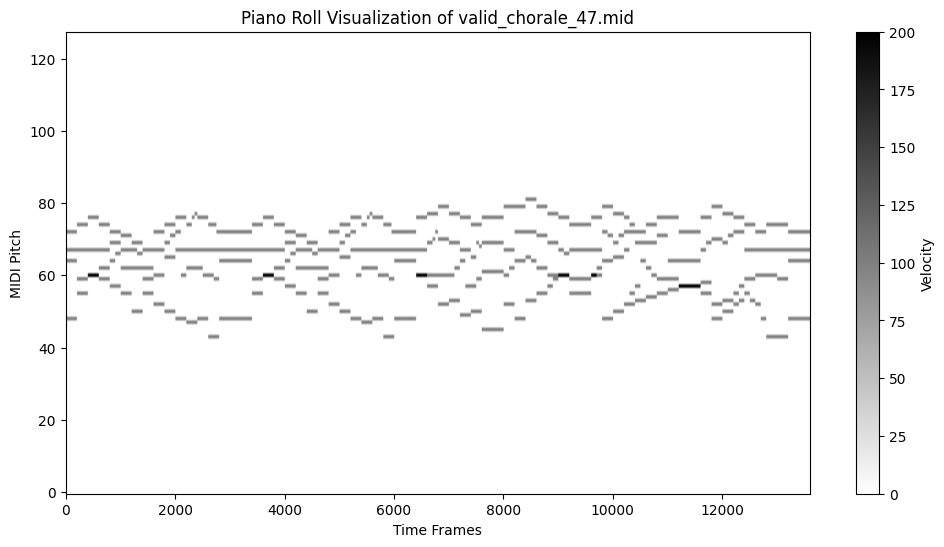

In [17]:
import os
import random
import pretty_midi
import matplotlib.pyplot as plt

# Specify the folder where your MIDI files are stored.
midi_folder = "/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/midi_outputs"

# Get all MIDI files in the folder.
midi_files = [f for f in os.listdir(midi_folder) if f.lower().endswith(".mid")]

if not midi_files:
    raise FileNotFoundError("No MIDI files found in the specified folder.")

# Randomly choose one MIDI file.
selected_file = random.choice(midi_files)
file_path = os.path.join(midi_folder, selected_file)
print(f"Selected MIDI file: {selected_file}")

# Load the selected MIDI file with PrettyMIDI.
pm = pretty_midi.PrettyMIDI(file_path)

# Generate a piano roll for visualization.
# fs sets the frame rate; adjust if necessary.
piano_roll = pm.get_piano_roll(fs=100)

# Plot the piano roll.
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll, aspect="auto", origin="lower", cmap="gray_r")
plt.xlabel("Time Frames")
plt.ylabel("MIDI Pitch")
plt.title(f"Piano Roll Visualization of {selected_file}")
plt.colorbar(label="Velocity")
plt.show()